In [22]:
# Import necessary libraries (updated to include new models)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline


In [23]:
# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [24]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [25]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [26]:
# Data Cleaning
matches = matches.dropna(subset=['winner', 'venue', 'toss_winner', 'toss_decision'])#To remove the missing Value
deliveries = deliveries.dropna(subset=['batting_team', 'bowling_team', 'batter', 'bowler'])


In [27]:
matches.head(10)#To show the last 5 rows of the dataset

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [28]:
deliveries.head() 

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN



=== Match & Team Performance Analysis! ===


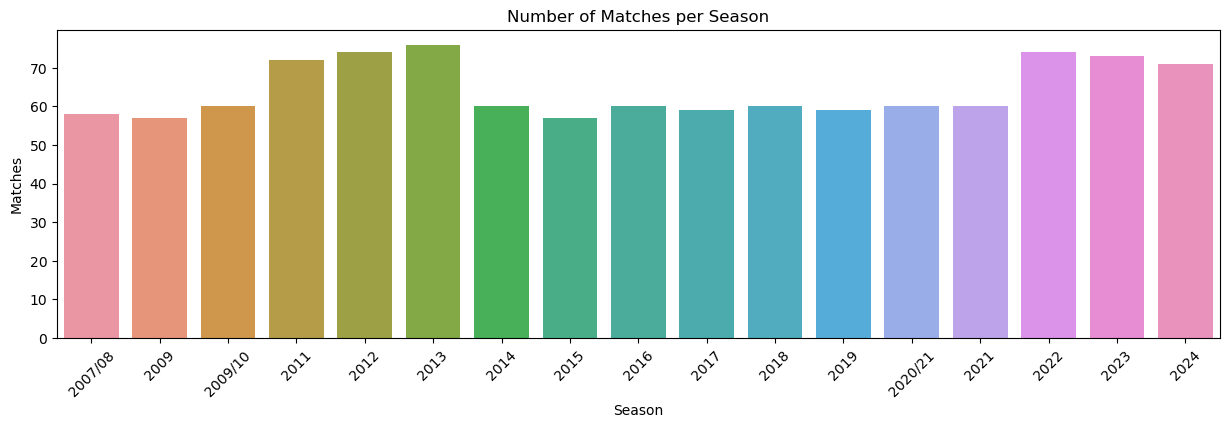

In [29]:
# 1. Match & Team Performance Analysis ---
print("\n=== Match & Team Performance Analysis! ===")

# Total matches per season
matches_per_season = matches.groupby('season')['id'].count().reset_index().rename(columns={'id': 'matches'})# To add rows in a DataFrame by one or more columns 
plt.figure(figsize=(15, 4))
sns.barplot(x='season', y='matches', data=matches_per_season)
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.xticks(rotation=45) # easier to read 
plt.show()



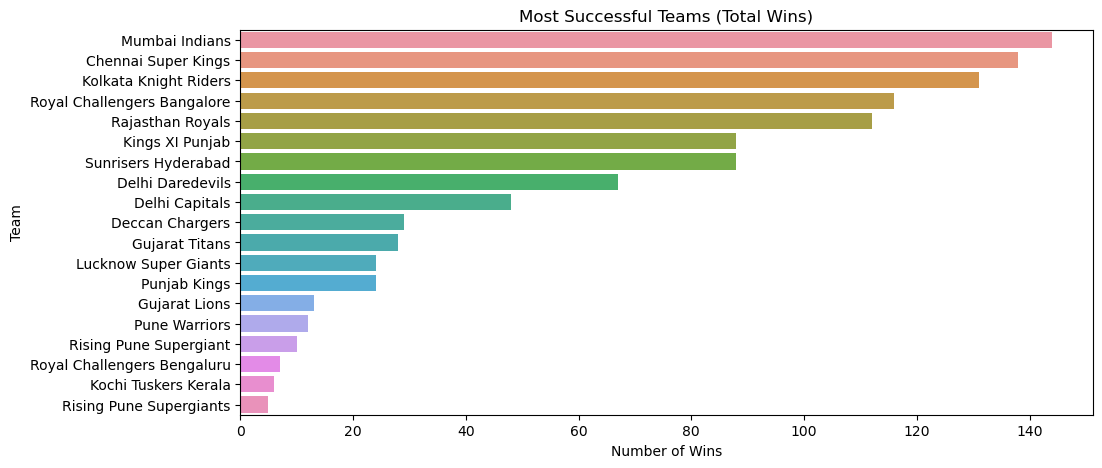

In [30]:
# Most successful teams (by wins)
team_wins = matches['winner'].value_counts()
plt.figure(figsize=(11, 5))
sns.barplot(y=team_wins.index, x=team_wins.values)
plt.title('Most Successful Teams (Total Wins)')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()


=== Player Statistics & Rankings ===


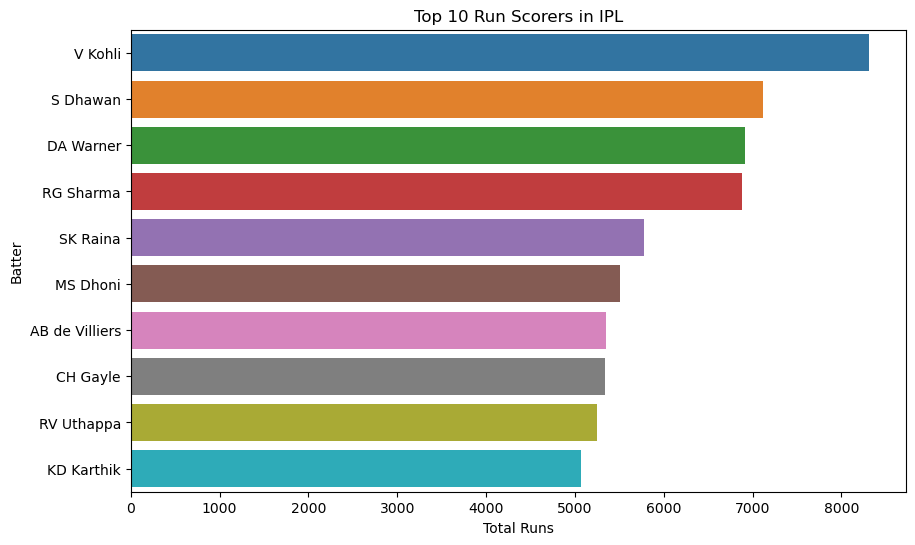

In [31]:
#2. Player Statistics & Rankings ---
print("\n=== Player Statistics & Rankings ===")

# Top run scorers
batsman_runs = deliveries.groupby('batter')['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=batsman_runs.index, x=batsman_runs.values)
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()


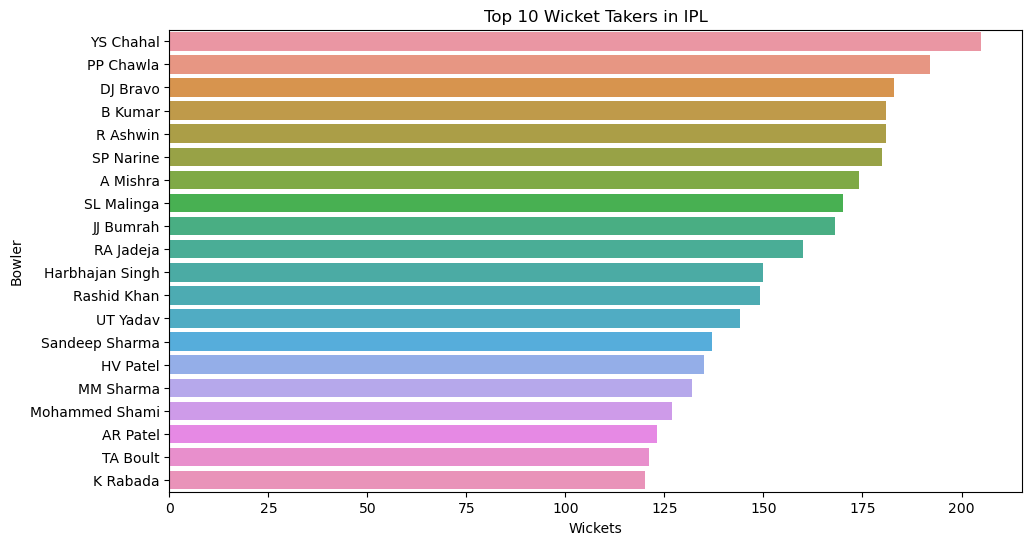

In [32]:
# Top wicket takers
bowler_wickets = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] !='run out')].groupby('bowler').size().sort_values(ascending=False).head(20)
plt.figure(figsize=(11, 6))
sns.barplot(y=bowler_wickets.index, x=bowler_wickets.values)
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()


In [33]:
# Player of the Match awards
pom = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(11, 6))
px.bar(y=pom.index, x=pom.values, title='Top 10 Player of the Match Award Winners',labels={'x': 'Awards', 'y': 'Player'}).show()


<Figure size 1100x600 with 0 Axes>

In [34]:
#3. Venue & Toss Impact Study 
print("\n=== Venue & Toss Impact Study ===")

# Matches per venue
venue_matches = matches['venue'].value_counts().head(20)
plt.figure(figsize=(20, 6))
px.bar(x=venue_matches.values, y=venue_matches.index, title='Top 10 Venues by Matches Hosted', labels={'x': 'Matches', 'y': 'Venue'}).show()



=== Venue & Toss Impact Study ===


<Figure size 2000x600 with 0 Axes>

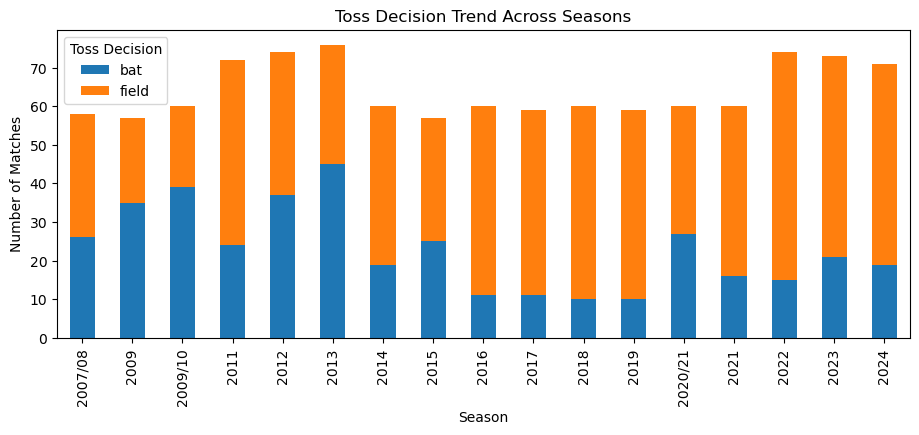

In [35]:
# Toss decision trend
toss_decision = matches.groupby('season')['toss_decision'].value_counts().unstack().fillna(0)# 0 denotes field and 1 denotes bat.
toss_decision.plot(kind='bar', stacked=True, figsize=(11, 4))
plt.title('Toss Decision Trend Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Toss Decision')
plt.show()


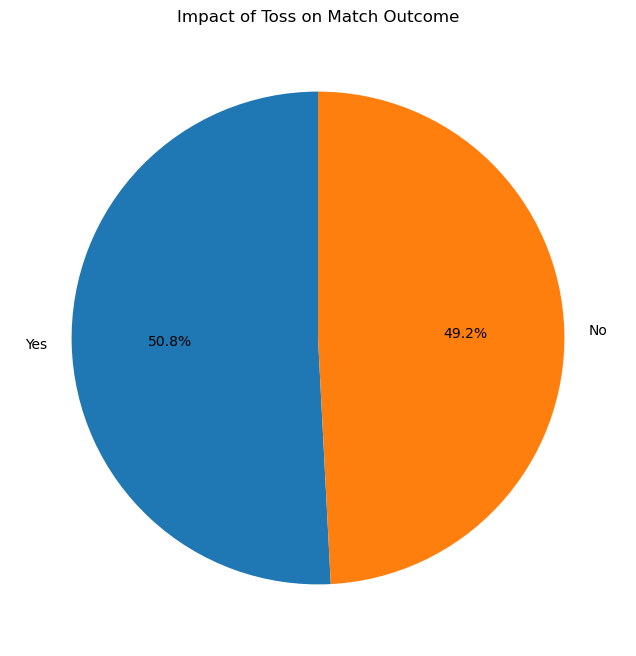

In [36]:
# Toss impact on match outcome
matches['toss_win_match_win'] = np.where(matches['toss_winner'] == matches['winner'], 'Yes', 'No')
toss_impact = matches['toss_win_match_win'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(toss_impact, labels=toss_impact.index, autopct='%1.1f%%', startangle=90)# To displays the percentage on the slices with 1 decimal precision.
plt.title('Impact of Toss on Match Outcome')
plt.show()




=== Head-to-Head Comparisons ===


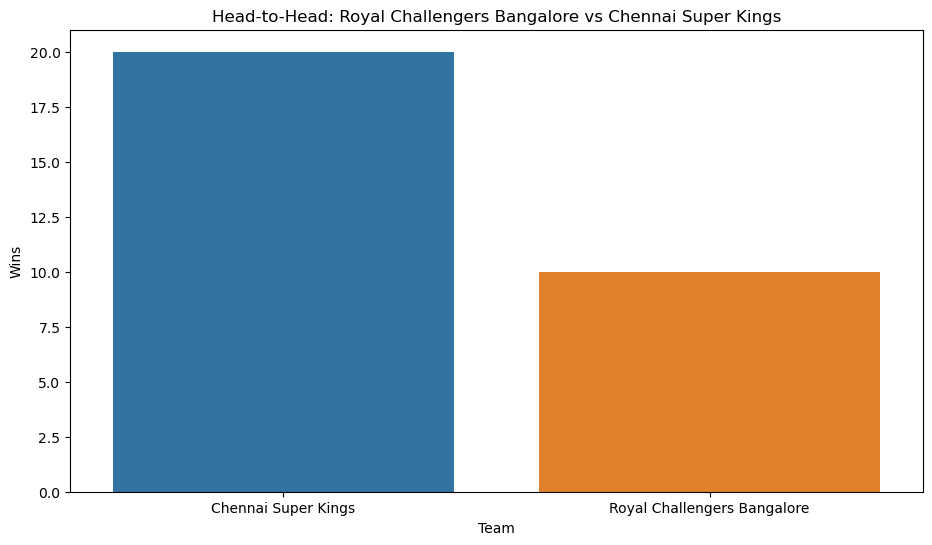

In [37]:
# 4. Head-to-Head Comparisons
print("\n=== Head-to-Head Comparisons ===")

# Head-to-head between two teams (e.g., Mumbai Indians vs Chennai Super Kings)
team1, team2 = 'Royal Challengers Bangalore', 'Chennai Super Kings'
head_to_head = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) | ((matches['team1'] == team2) & (matches['team2'] == team1))]
h2h_wins = head_to_head['winner'].value_counts()
plt.figure(figsize=(11, 6))
sns.barplot(x=h2h_wins.index, y=h2h_wins.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()



=== Win Prediction & Trend Analysis ===
Win Prediction Accuracy: 0.48


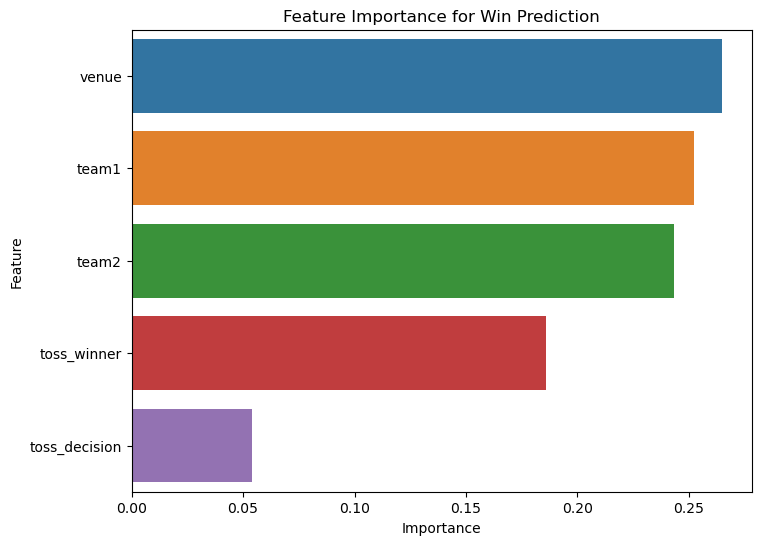

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Accuracy: 0.25
Support Vector Machine Accuracy: 0.39
Decision Tree Accuracy: 0.42


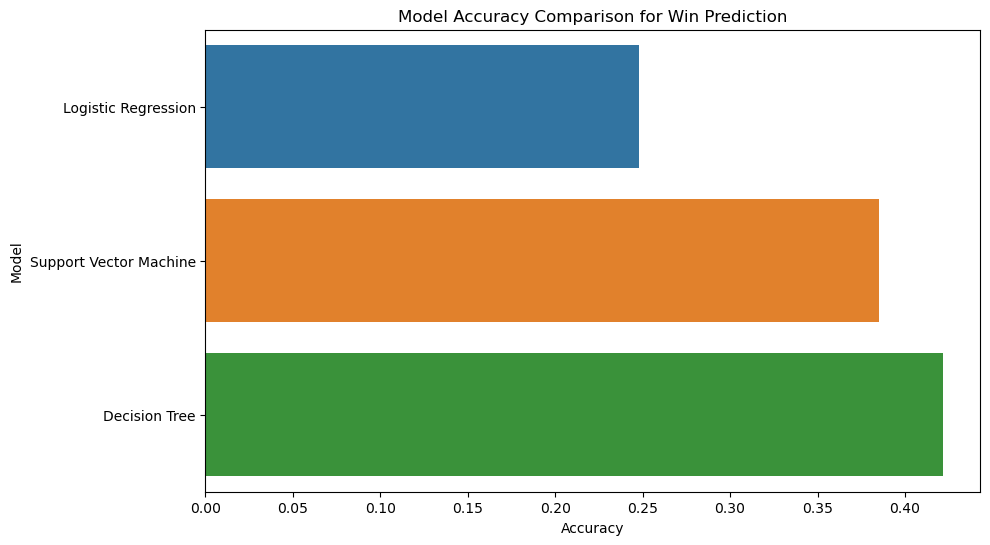

Win margin columns ('win_by_runs', 'win_by_wickets') not found in dataset. Skipping regression.


In [38]:
# --- 5. Win Prediction & Trend Analysis ---
print("\n=== Win Prediction & Trend Analysis ===")

# Prepare data for win prediction
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
target = 'winner'

# Encode categorical variables
le = LabelEncoder()
for col in features + [target]:
    matches[col] = le.fit_transform(matches[col].astype(str))

# Split data
X = matches[features]
y = matches[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Win Prediction Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Feature importance
importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance for Win Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),

}

# Train and evaluate classification models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()))
plt.title('Model Accuracy Comparison for Win Prediction')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Multiple Linear Regression for win margin prediction (if applicable)
# Note: Requires a numerical target (e.g., run margin or win margin)
if 'win_by_runs' in matches.columns and 'win_by_wickets' in matches.columns:
    # Create a win margin column (runs if win_by_runs > 0, else wickets)
    matches_encoded['win_margin'] = matches.apply(
        lambda x: x['win_by_runs'] if x['win_by_runs'] > 0 else x['win_by_wickets'], axis=1
    )
    # Prepare data for regression
    X_reg = matches_encoded[features]
    y_reg = matches_encoded['win_margin']
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train_reg, y_train_reg)
    y_pred_reg = lr.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"Multiple Linear Regression MSE for Win Margin Prediction: {mse:.2f}")
    
    # Plot actual vs predicted win margins
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plt.title('Actual vs Predicted Win Margin (Linear Regression)')
    plt.xlabel('Actual Win Margin')
    plt.ylabel('Predicted Win Margin')
    plt.show()
else:
    print("Win margin columns ('win_by_runs', 'win_by_wickets') not found in dataset. Skipping regression.")






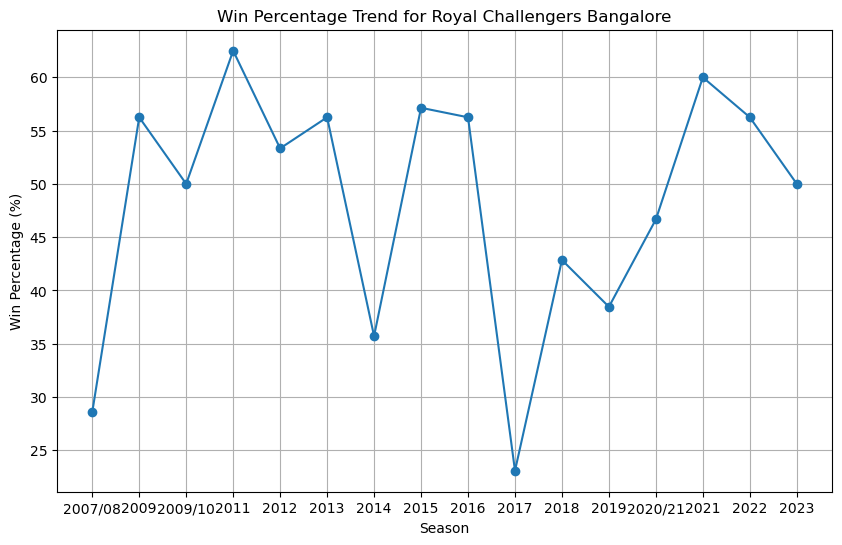

In [39]:
# Trend analysis: Win percentage over seasons for a team
team = 'Royal Challengers Bangalore'
team_matches = matches[(matches['team1'] == le.transform([team])[0]) | (matches['team2'] == le.transform([team])[0])]
win_trend = team_matches.groupby('season').apply(lambda x: (x['winner'] == le.transform([team])[0]).mean() * 100)
plt.figure(figsize=(10, 6))
plt.plot(win_trend.index, win_trend.values, marker='o')
plt.title(f'Win Percentage Trend for {team}')
plt.xlabel('Season')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.show()

In [40]:
# scatter plot: Runs vs Wickets for top batsmen
top_batsmen = deliveries.groupby('batter')['total_runs'].sum().sort_values(ascending=False).head(10).index
batsman_stats = deliveries[deliveries['batter'].isin(top_batsmen)].groupby('batter').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['ball']) * 100

fig = px.scatter(batsman_stats, x='total_runs', y='strike_rate', text='batter', size='ball',
                 title='Top Batsmen: Runs vs Strike Rate', hover_data=['batter'])
fig.update_traces(textposition='top center')
fig.show()


In [41]:
# Interactive venue performance
venue_wins = matches.groupby(['venue', 'winner']).size().unstack().fillna(0)
fig = px.imshow(venue_wins, title='Team Wins by Venue', labels=dict(x='Team', y='Venue', color='Wins'))
fig.show()